In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Population totale, N.
N = 10000
# Nombre initial d'infectés, de rétablis, I0, R0.
I0, R0 = 1, 0

In [3]:
# Taux de contagion, beta, taux moyen de rétablissement, gamma.
beta, gamma = 0.008, 0.0008
# Les autres, S0, sont susceptibles d'être inféctés.
S0 = N - I0 - R0

In [4]:
# Une grille de points temporels (en jours)
t = np.linspace(0, 10000, 10000)

In [5]:
# Les équations différentielles de SIR.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [6]:
# Vecteur de conditions initiales
y0 = S0, I0, R0
# Integration des équations SIR dans la grille temporelle, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

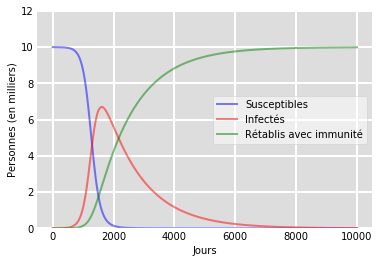

In [7]:
# Construire le graphique avec trois courbes pour S(t), I(t) et R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptibles')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infectés')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Rétablis avec immunité')
ax.set_xlabel('Jours')
ax.set_ylabel('Personnes (en milliers)')
ax.set_ylim(0,12)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()